In [1]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("모듈 import 완료!")

모듈 import 완료!


In [2]:
ts = 28

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일을 같은 사이즈로 바꾸어 저장합니다.
    target_size=(ts,ts)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS) # ANTIALAS 해상도 보정
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

print('리사이징 함수 생성')

리사이징 함수 생성


In [ ]:
image_dir_path = "/content/drive/MyDrive/Colab/rsp/scissor"
resize_images(image_dir_path)
image_dir_path = "/content/drive/MyDrive/Colab/rsp/rock"
resize_images(image_dir_path)
image_dir_path = "/content/drive/MyDrive/Colab/rsp/paper"
resize_images(image_dir_path)

print("가위,바위,보 이미지 resize 완료!")

In [4]:
def load_data(img_path, number_of_data=4200):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=ts
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab/rsp" # 경로 주의
(x_train, y_train)=load_data(image_dir_path)
# 정규화는 하단에서 최댓값 확인 후 처리

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 4200 입니다.
x_train shape: (4200, 28, 28, 3)
y_train shape: (4200,)


# 트레이닝셋과 테스트셋 분리 -> 폐기

x_train, x_test, y_train, y_test = train_test_split(rps_data, 
                                                    rps_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('x_train 개수: ', len(x_train), ', x_test 개수: ', len(x_test))


In [ ]:
# 테스트 데이터 만들기, 경로 주의!

image_dir_path = "/content/drive/MyDrive/Colab/rsp_test3/scissor"
resize_images(image_dir_path)
image_dir_path = "/content/drive/MyDrive/Colab/rsp_test3/rock"
resize_images(image_dir_path)
image_dir_path = "/content/drive/MyDrive/Colab/rsp_test3/paper"
resize_images(image_dir_path)

print("가위,바위,보 이미지 resize 완료!")

In [6]:
def load_test_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=ts
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [7]:
image_dir_path = "/content/drive/MyDrive/Colab/rsp_test3/" # 경로 주의
(x_test, y_test)=load_test_data(image_dir_path)
print('테스트 데이터 저장')

데이터의 이미지 개수는 600 입니다.
테스트 데이터 저장


In [8]:
# 정규화

print('train 최소값:',np.min(x_train), ' train 최대값:',np.max(x_train))
print('test 최소값:',np.min(x_test), ' test최대값:',np.max(x_test))

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('train 최소값:',np.min(x_train_norm), ' train 최대값:',np.max(x_train_norm))
print('test 최소값:',np.min(x_test_norm), ' test 최대값:',np.max(x_test_norm))

train 최소값: 0  train 최대값: 255
test 최소값: 0  test최대값: 255
train 최소값: 0.0  train 최대값: 1.0
test 최소값: 0.0  test 최대값: 1.0


In [27]:
# 하이퍼파라미터
depth = 32
n_dense = 64
n_train_epoch = 50

# 모델 만들기

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(depth*1, (3,3), activation='relu', input_shape=(ts,ts,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(depth*2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(depth*4, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [28]:
# 모델 학습하기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/50
132/132 [==============================] - 6s 39ms/step - loss: 0.9987 - accuracy: 0.4671
Epoch 2/50
132/132 [==============================] - 5s 39ms/step - loss: 0.5897 - accuracy: 0.7514
Epoch 3/50
132/132 [==============================] - 5s 39ms/step - loss: 0.3126 - accuracy: 0.8838
Epoch 4/50
132/132 [==============================] - 5s 39ms/step - loss: 0.1712 - accuracy: 0.9417
Epoch 5/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0799 - accuracy: 0.9788
Epoch 6/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0548 - accuracy: 0.9852
Epoch 7/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0464 - accuracy: 0.9867
Epoch 8/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0256 - accuracy: 0.9940
Epoch 9/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0312 - accuracy: 0.9914
Epoch 10/50
132/132 [==============================] - 5s 40ms/step - loss: 0.0133 - accura

In [29]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 4.4027 - accuracy: 0.7633
test_loss: 4.402680397033691 
test_accuracy: 0.7633333206176758


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<function matplotlib.pyplot.show>

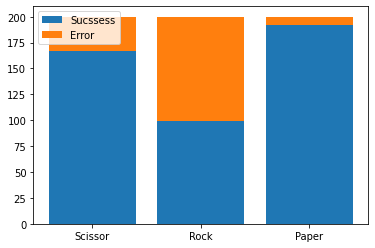

In [30]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) # model이 추론한 결과값

wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모으기 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# 가위(0~199), 바위(200~399), 보(400~599) 따로 나누기
scissor_error = []
rock_error = []
paper_error = []
for i in wrong_predict_list:
    if i < 200:
        scissor_error.append(i)
    elif 200 <= i < 400:
        rock_error.append(i)
    else:
        paper_error.append(i)

# 실패와 성공 분류
error_ratio = [len(scissor_error), len(rock_error), len(paper_error)]
sucsess_ratio = [200-len(scissor_error), 200-len(rock_error), 200-len(paper_error)]

plt.subplot().set_xticks([0, 1, 2])
plt.subplot().set_xticklabels(['Scissor', 'Rock', 'Paper'])
plt.bar(range(3), sucsess_ratio)
plt.bar(range(3), error_ratio, bottom = sucsess_ratio)
plt.legend(['Sucssess', 'Error'])
plt.show

In [31]:
# 채점하기
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1) # model이 추론한 결과값

output = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])

for i, j in enumerate(predicted_labels):
    for k in range(3):
        if y_test[i] == k:
            output[k][j] += 1



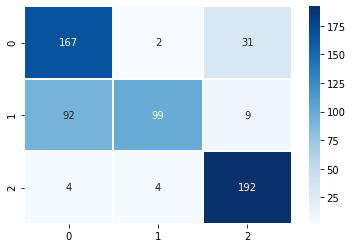

In [32]:
sns.heatmap(output, linewidths = 1, cmap = 'Blues', annot = True, fmt = 'd')

# 결론

### 첫번째 시도

클라우드로 제공된 300개의 트레인테이터와 300개의 테스트 데이터를 이용해 진행

여러 하이퍼파라미터를 조정해봤지만 정확도가 40~ 50% 부근에서만 머뭄

- 예상 원인: 트레인 데이터 수의 부족

- 해결 방안: 트레인 데이터 수를 늘리자

### 두번째 시도

노션에 공유된 4000개 이상의 데이터를 가지고 학습.

클라우드의 테스트 데이터 300개를 테스트 데이터로 사용

이번에는 65% 정도가 최대이고, 더이상 올라갈 기미가 안보임

뭐가 문젠지 확인하기 위해 오류 데이터를 따로 담아서 스택바로 시각화

나머지는 다 맞추는데 가위만 계속 정답률이 바닥인 이상현상 확인

어쩌다 가위를 잘 맞춘다 싶으면 보자기가 바닥을 치고..

- 예상 원인: 테스트 데이터의 질이 낮음

- 해결 방안: 다른 테스트 데이터로 해보자

### 세번째 시도

이번에는 사천개 이상의 데이터 중에서 트레인과 테스트를 분리해서 사용해보기로 결정

시작하자마자 정확도가 98%가 나와서 망해버렸다

코드 자체는 문제가 없었던 것 같은데...

- 예상 원인: 트레인과 테스트의 유사성?

아무래도 데이터가 완전히 랜덤한게 아니라 한 사람이 비슷한 사진을 백장씩 찍다 보니

완전히 셔플 후  두 덩어리로 나뉘었을 때,

양쪽의 사진 구성이 지나치게 비슷하지 않았나 하는 의심

- 해결 방법: 테스트셋 스플릿을 폐기하고 다른 테스트셋으로 시도

### 네번째 시도 <- 이 파일은 이 버전의 기록

노션에 두명분의 데이터 600개가 추가되었길래 그 데이터를 테스트로 사용하기로 결정

드디어 하나의 값만 비이상적으로 못맞추는 경우는 벗어남

처음 시도했을 때는 고르게 60% 정도의 정답률을 보였는데

그게 우연이었던 건지 계속된 시도에서는 바위만 계속 반타작을 하길래

뭐랑 헷갈려서 이러는건가 싶어서 결과 데이터를 좀 더 쪼개서 히트맵을 만들어봄

이번엔 절반정도의 데이터가 가위랑 바위랑 구분하지를 못하고 있음

- 예상 원인: 2명의 데이터 중 한명의 주먹 데이터만 분석이 어려운게 아닐까

- 해결 방법: 한명의 데이터만 따로 테스트

### 다섯번째 시도

비교적 사진을 뚜렷하게 찍어주신 분의 데이터로 재시도

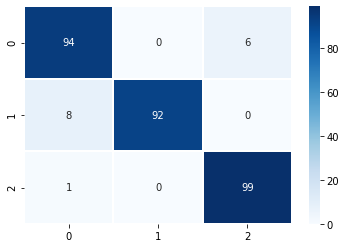

진짜 깔끔하게 95%의 정확도를 보임

제출하기엔 양심에 찔릴 정도라 네번째 시도 버전으로 제출하기로 결정

끝

### 최종 결론

물론 코드 작성도 중요하고 하이퍼파라미터 설정도 중요하지만 

트레인 데이터와 테스트 데이터의 수와 질도 중요함을 느꼈다.

너무 비슷한 사진만으로 이루어진 데이터는 갯수가 아무리 많아도 별 의미가 없는 것 같고

두번째와 네번째 시도에서 특정 테스트 데이터만 분석이 실패한 걸로 보아,

그 부류의 데이터는 트레인되지 않은 상황인 건데,

전체적으로 고르게, 중요한 피처들을 다양하게 담아내는 트레인 데이터가 가장 중요한 것 같다.


